In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten 
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

## Importing dataset with Data Preprocessing

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(256,256),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [10]:
count=0
for image_batch, label_batch in train_generator:
    print(label_batch)
    print(image_batch[0])
    break

[4. 0. 0. 2. 5. 0. 6. 6. 5. 5. 0. 6. 2. 0. 4. 2. 5. 0. 6. 3. 2. 0. 6. 6.
 4. 3. 0. 0. 5. 0. 0. 1.]
[[[0.01507064 0.23983133 0.27450982]
  [0.01498415 0.23991783 0.27450982]
  [0.01489766 0.24000433 0.27450982]
  ...
  [0.06851931 0.27389228 0.34386295]
  [0.07843138 0.2681219  0.33602175]
  [0.07904702 0.25305507 0.32694924]]

 [[0.01568628 0.2392157  0.27450982]
  [0.01568628 0.2392157  0.27450982]
  [0.01568628 0.2392157  0.27450982]
  ...
  [0.06877878 0.2738058  0.34369   ]
  [0.07843138 0.26777592 0.33584875]
  [0.0791335  0.2527956  0.32660326]]

 [[0.01238225 0.23591168 0.27120578]
  [0.01246874 0.23599815 0.27129227]
  [0.01255523 0.23608465 0.2713788 ]
  ...
  [0.06903824 0.27371928 0.343517  ]
  [0.07843138 0.26742995 0.33567578]
  [0.07922    0.25253612 0.32625732]]

 ...

 [[0.05019178 0.08940747 0.0972506 ]
  [0.0509804  0.09019608 0.09803922]
  [0.0509804  0.09019608 0.09803922]
  ...
  [0.05018987 0.09332713 0.1090134 ]
  [0.05027636 0.09341361 0.10909989]
  [0.05036285 

In [9]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Maruti Swift',
 'Rolls Royce',
 'Tata Safari',
 'Toyota Innova']

In [6]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(256,256),
        class_mode="sparse"
)

Found 1386 images belonging to 7 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.15686275 0.18431373 0.25882354]
  [0.15686275 0.18431373 0.25882354]
  [0.16992065 0.19737165 0.27188146]
  ...
  [0.03986645 0.30103508 0.6187214 ]
  [0.03455603 0.29541227 0.6146605 ]
  [0.02924561 0.2897895  0.61059964]]

 [[0.15686275 0.18431373 0.25882354]
  [0.15686275 0.18431373 0.25882354]
  [0.16804639 0.19549736 0.2700072 ]
  ...
  [0.02971643 0.290104   0.62420785]
  [0.0356516  0.29635155 0.63139254]
  [0.04158678 0.3025991  0.63857716]]

 [[0.15686275 0.18431373 0.25882354]
  [0.15686275 0.18431373 0.25882354]
  [0.16617213 0.19362311 0.2681329 ]
  ...
  [0.07450981 0.3372549  0.6784314 ]
  [0.07450981 0.3372549  0.6784314 ]
  [0.07450981 0.3372549  0.6784314 ]]

 ...

 [[0.70980394 0.6627451  0.5686275 ]
  [0.70980394 0.6627451  0.5686275 ]
  [0.70980394 0.6627451  0.5686275 ]
  ...
  [0.8313726  0.81568635 0.80392164]
  [0.83373016 0.8180439  0.8062792 ]
  [0.8352942  0.8196079  0.8078432 ]]

 [[0.7132696  0.6662107  0.57209307]
  [0.71389425 0.6668354  0.5727178 ]


## Creating the CNN model

In [31]:
# Initializing the CNN
model = Sequential()

In [32]:
# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolution layer and pooling
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=7, activation='softmax')) 

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,843,335 (56.62 MB)

 Trainable params: 14,843,335 (56.62 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling and Training Phase

In [34]:
from tensorflow.keras.optimizers import Adam

In [35]:
# Compile the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [45]:
# Fit the model
history = model.fit(
    train_generator,                   
    steps_per_epoch=len(train_generator),  
    epochs=1,                      
    validation_data=test_generator,    
    validation_steps=len(test_generator),  
)

105/105 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8718 - loss: 0.3666 - val_accuracy: 0.8564 - val_loss: 0.5823


## Evaluating Model

In [48]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(train_generator)
print('Training accuracy:', train_acc)

105/105 ━━━━━━━━━━━━━━━━━━━━ 61s 579ms/step - accuracy: 0.9785 - loss: 0.0829
Training accuracy: 0.9761336445808411


In [47]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(test_generator)
print('Validation accuracy:', val_acc)

44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 543ms/step - accuracy: 0.8646 - loss: 0.5239
Validation accuracy: 0.8535353541374207


## Accuracy Visualization

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

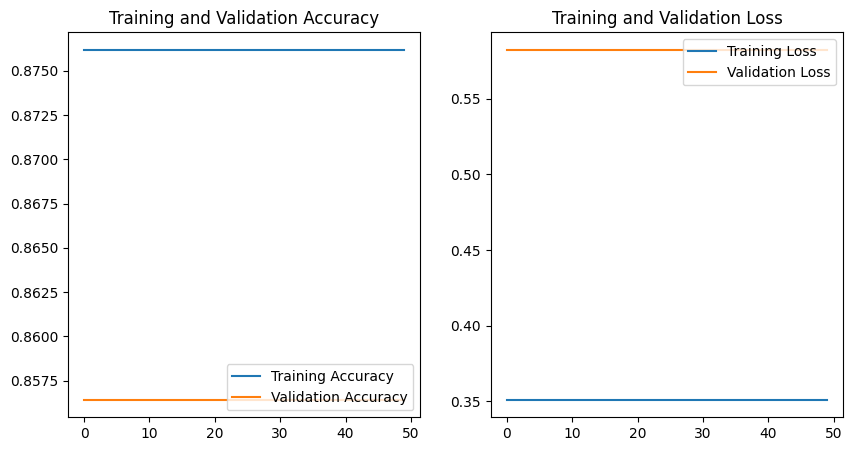

In [97]:
EPOCHS = 50

acc = [0.8761933445930481] * EPOCHS
val_acc = [0.8564213514328003] * EPOCHS
loss = [0.35107555985450745] * EPOCHS
val_loss = [0.5822506546974182] * EPOCHS

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


#### Testing the prediction on sample of image from test dataset

In [71]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


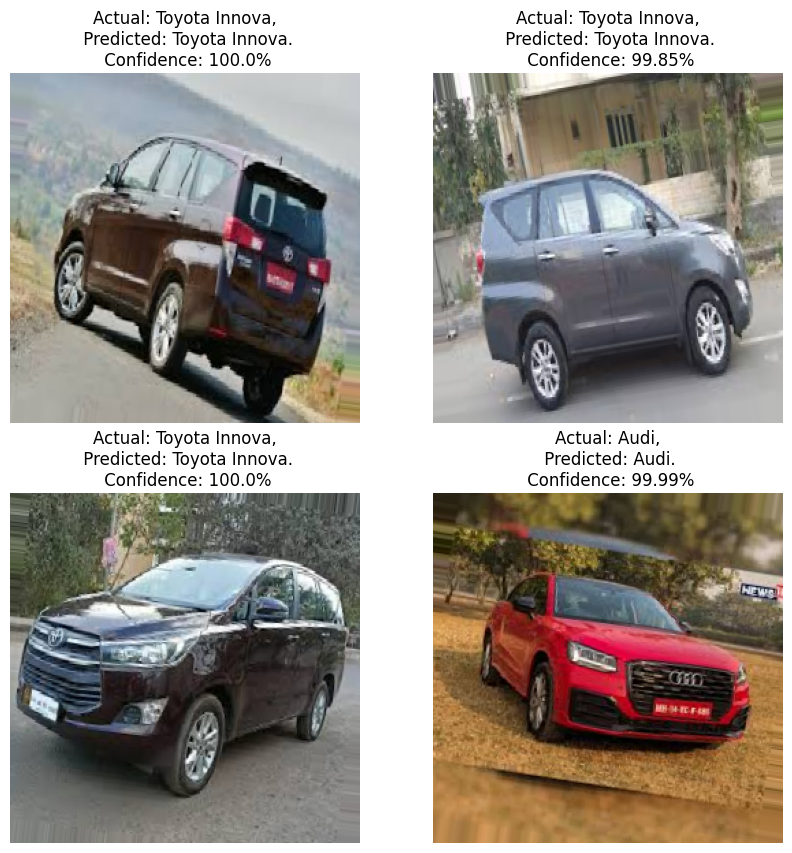

In [85]:
plt.figure(figsize=(10,10))
for images, labels in test_generator:
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break
